In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings # current version of seaborn generates a bunch of warnings that will be ignore
warnings.filterwarnings('ignore')

# 1. DATASET PREPRATION AND PREPROCESSING

# Data Collection

In [3]:
# from sklearn import datasets
# iris = datasets.load_iris()
# from sklearn.datasets import load_iris
# iris = load_iris()
# iris
#type(iris)
#iris.keys()
#columns_names = np.append(iris.feature_names, ['class'] )
#data = np.c_[iris.data, iris.target]
#iris = pd.DataFrame(data, columns = columns_names)
iris = pd.read_csv("iris.data", names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'])

In [4]:
iris.tail()

,sepal-length,sepal-width,petal-length,petal-width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris.shape

(150, 5)

In [6]:
iris.index

RangeIndex(start=0, stop=150, step=1)

In [7]:
iris.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'], dtype='object')

In [8]:
iris.count()

sepal-length    150
sepal-width     150
petal-length    150
petal-width     150
class           150
dtype: int64

In [9]:
iris['class'].nunique()

3

In [10]:
iris['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


* Descriptive Statistics

In [12]:
iris.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
iris.describe(include=['O'])

,class
count,150
unique,3
top,Iris-virginica
freq,50


# Data Visualisation

In [14]:
sns.set(style="darkgrid")

#sns.palplot(sns.color_palette("BuGn_r"))

sns.set_palette("husl",7)
#sns.set_palette("Reds",7)
#sns.set_palette("PuBuGn_d",7)
#sns.set_palette("BuGn_r",7)
#sns.set_palette("RdBu_r", 7)
#sns.set_palette("coolwarm", 7)
#sns.set_palette("ch:2.5,-.2,dark=.3")

#with sns.color_palette("PuBuGn_d"):
    #sinplot()

cmap = sns.cubehelix_palette(8, dark=0, light=1, as_cmap=True)
#cmap = sns.cubehelix_palette(8, rot=-.4, as_cmap=True)

* Correlation between Dataset Features

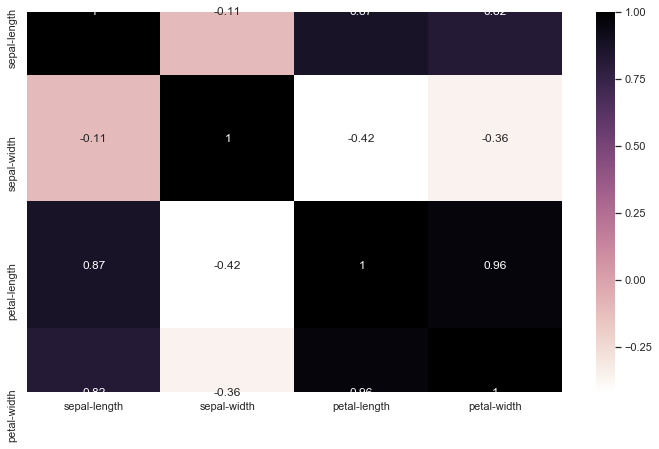

In [15]:
plt.figure(figsize=(12,7))
#sns.heatmap(iris.corr(), annot=True)
sns.heatmap(iris.corr(), annot=True, cmap=cmap)

* DATASET Feature visualisation
  * Frequency Distrubution - Count Plot (Qualitative Variable), 
     * Histogram (DISTplot - hist + KDE) Plot (Quntitative Variable)
  * Joint Distribution of two variable - Scatter Plot (Quntitative Variable)

* 1. Count Plot (Qualitative Variable)

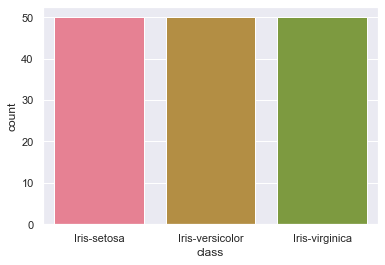

In [16]:
#with sns.color_palette("PuBuGn_d"):
sns.countplot(iris.iloc[:, 4])

* 1a. Histogram (DISTplot - hist + KDE) Plot (Quntitative Variable) 

In [17]:
#iris_drop = iris.drop('class',axis=1)
#for index,columns in enumerate(iris_drop):
    #plt.figure(index)
    #plt.figure(figsize=(15,15))
    #sns.stripplot(x='class', y= columns, data= iris, jitter=True, palette = 'Set1')  

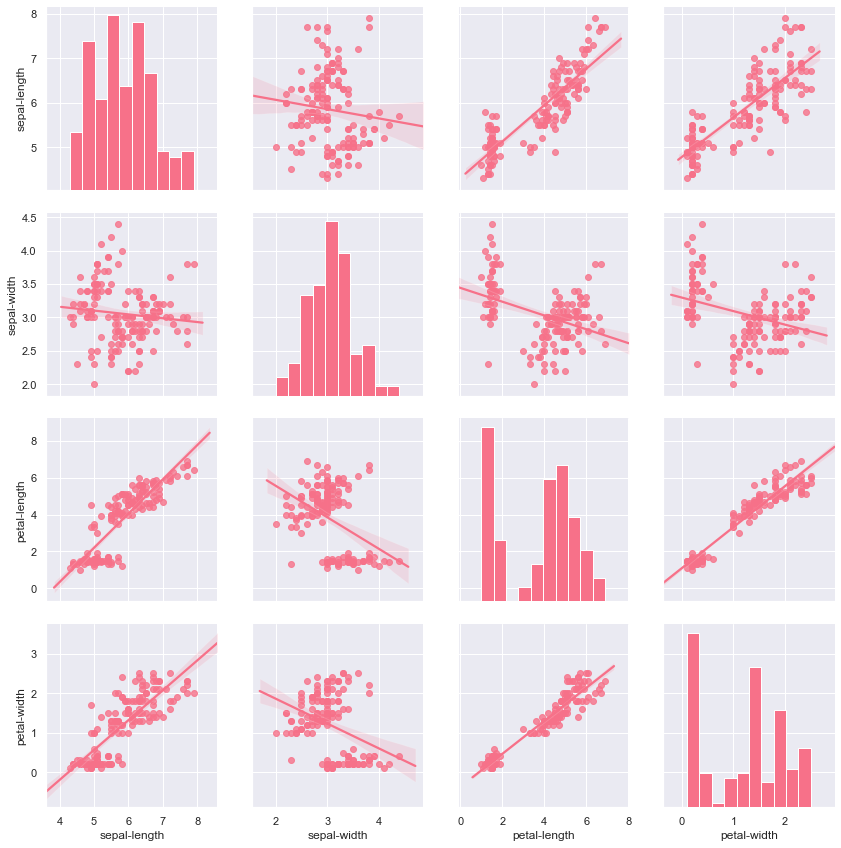

In [18]:
sns.pairplot(iris, size = 3, kind="reg")

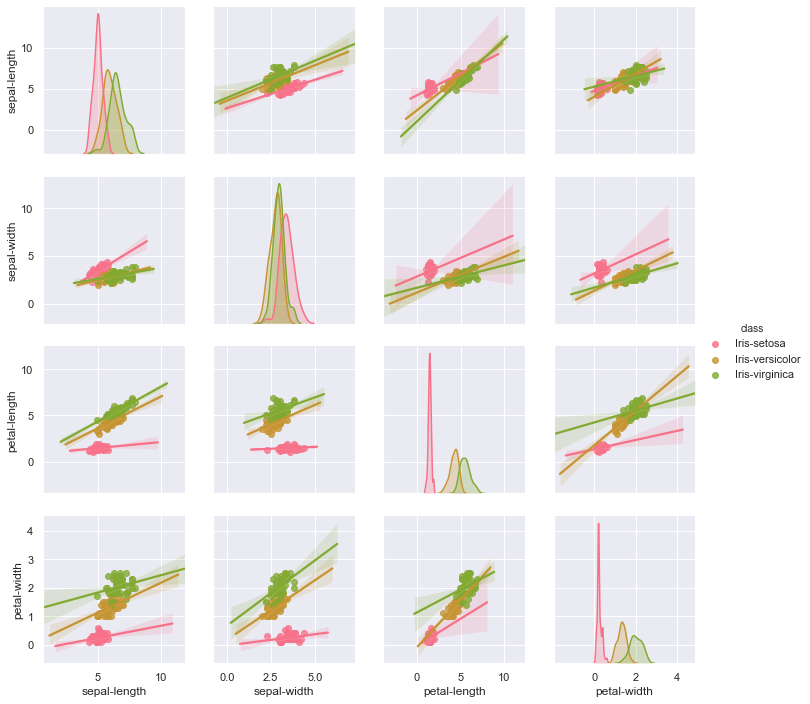

In [19]:
sns.pairplot(iris, hue='class', kind="reg")

* DATASET Feature visualisation
  * Descriptive Statistics - Box plot

<Figure size 432x288 with 0 Axes>

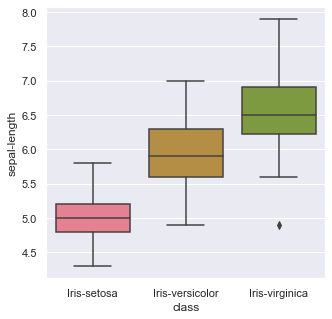

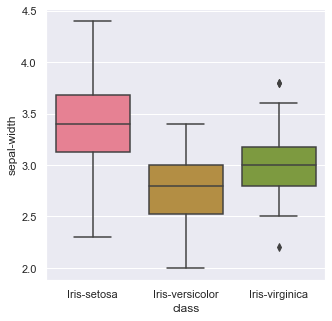

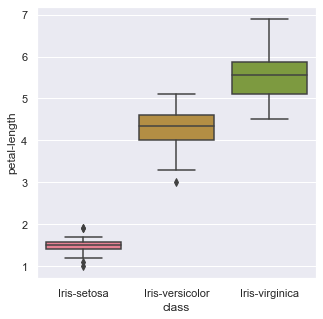

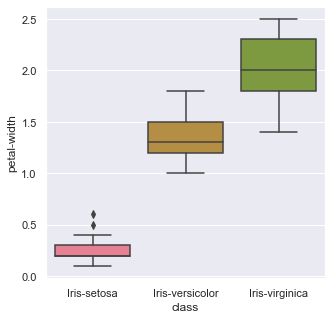

In [20]:
#fig, axes = plt.subplots(2, 2, figsize=(15,7))

#ax = sns.boxplot(x=iris.iloc[:, 4], y=iris.iloc[:, 0], data=iris, orient='v', ax=axes[0, 0])
#ax = sns.boxplot(x=iris.iloc[:, 4], y=iris.iloc[:, 1], data=iris, orient='v', ax=axes[0, 1])
#ax = sns.boxplot(x=iris.iloc[:, 4], y=iris.iloc[:, 2], data=iris, orient='v', ax=axes[1, 0])
#ax = sns.boxplot(x=iris.iloc[:, 4], y=iris.iloc[:, 3], data=iris, orient='v', ax=axes[1, 1])

iris_drop = iris.drop('class',axis=1)
for index,columns in enumerate(iris_drop):
    plt.figure(index)
    plt.figure(figsize=(5,5))
    sns.boxplot(x='class', y= columns, data= iris)  

* DATASET Feature visualisation
  * Central Tendency - Bar plot (quntitative variable)

<Figure size 432x288 with 0 Axes>

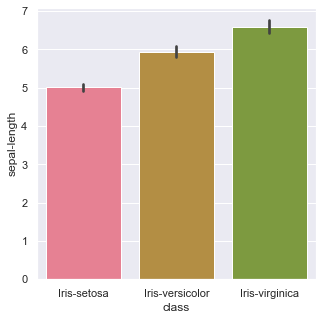

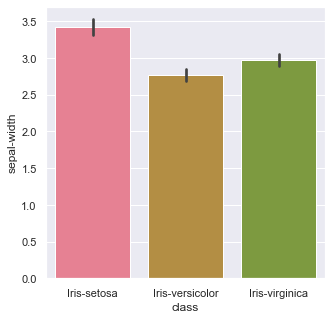

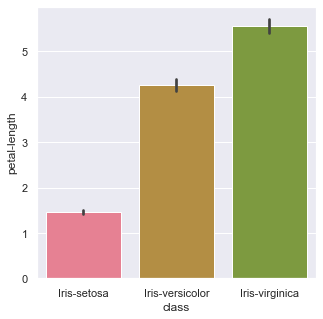

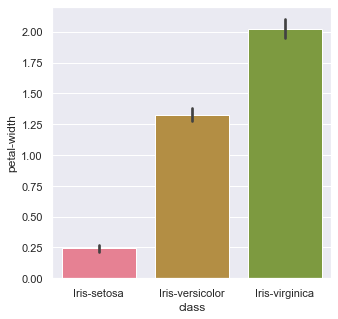

In [21]:
#fig, axes = plt.subplots(2, 2, figsize=(15,7))

#ax = sns.barplot(x=iris.iloc[:, 4], y=iris.iloc[:, 0], data=iris, orient='v', ax=axes[0, 0])
#ax = sns.barplot(x=iris.iloc[:, 4], y=iris.iloc[:, 1], data=iris, orient='v', ax=axes[0, 1])
#ax = sns.barplot(x=iris.iloc[:, 4], y=iris.iloc[:, 2], data=iris, orient='v', ax=axes[1, 0])
#ax = sns.barplot(x=iris.iloc[:, 4], y=iris.iloc[:, 3], data=iris, orient='v', ax=axes[1, 1])

iris_drop = iris.drop('class',axis=1)
for index,columns in enumerate(iris_drop):
    plt.figure(index)
    plt.figure(figsize=(5,5))
    sns.barplot(x='class', y= columns, data= iris)

# Preprocessing

* Data Labeling?
* Data Selection?
* Data formatting
* Data cleaning
* Data anonymization
* Data sampling

In [22]:
from numpy import array
from numpy import argmax

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

* DATA FEATURE SELECTION AND MISSING HANDLING

* Converting Features - Categorical features into Numeric form

In [23]:
#* Encoding of Categorial Variables
  #* Integer Encoding
  #* One Hot Encoding

In [24]:
#y= iris['class']
#values = array(y)
#print(values)
# integer encode
#label_encoder = LabelEncoder()
#integer_encoded = label_encoder.fit_transform(values)
#print(integer_encoded)

#integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
#print(integer_encoded)

# binary encode
#ohe = OneHotEncoder(sparse=False)
#onehot_encoded = ohe.fit_transform(integer_encoded)
#onehot_encoded = ohe.fit_transform(iris[['class']])
#print(onehot_encoded)

# invert first example
#inverted = label_encoder.inverse_transform([argmax(integer_encoded[0, :])])
#print(inverted)

In [25]:
#pd.get_dummies(iris.iloc[:, 4]).head()

In [26]:
#.map({:,:})

# Data Transformation

* Scaling
* Decomposition
  * PCA
* Aggregation

* PCA

In [27]:
from sklearn.decomposition import PCA

In [28]:
#iris_drop = iris.drop('class', axis = 1)
#X = iris_drop.values
X = iris.drop('class', axis = 1)

In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

Text(0.5, 1.0, 'PCA Scatter Plot')

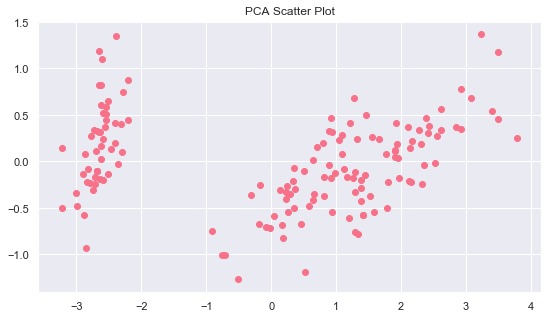

In [30]:
plt.figure(figsize = (9,5))
plt.scatter(X_pca[:,0], X_pca[:,1]) #, c = iris['class']
plt.title('PCA Scatter Plot')

# 2. DATASET SPLITING

* Training set - 
* Validation set - used as a part of a training set & to tune the parameters
  * used for - parameter selection
* Test set - evaluating the performance of a trained model

In [31]:
from sklearn import model_selection

In [32]:
# split validation dataset
#array = iris.values
#X = array[:, 0:4]
X = iris.drop('class', axis=1)
#X.head()
#type(X)

#y = array[:, 4]
y= iris['class']
#type(y)
#y.value_counts()

val_size = 0.2
seed = 7
# Xtrain, Xtest, ytrain, ytest = model_selection.train_test_split(X, y, test_size = val_size, random_state = seed)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = val_size, random_state = seed)

# 3. MODELING

* Model training
* Model evaluation and testing
  * Training and testing on the same data
  * Train/test split Dataset
    * Train/test split
    * Cross-validation
    * Leave One Out (LOO) Cross Validation
    * Repeated Random Test-Train Splits
  * PCA components
    * Pipelining
* Improving predictions with ensemble methods

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Training and testing on the same data

In [34]:
# make predictions
#LR = LogisticRegression(solver='lbfgs')
LR = LogisticRegression()
LR.fit(X, y)

LR.score(X, y)
#predictions = LR.predict(X)
#print("Accuracy:", accuracy_score(y, predictions))
#print(confusion_matrix(y, predictions))
#print(classification_report(y, predictions))

#cross_val_score(LR, X, y, scoring = scoring).mean() # DON'T USE HERE

0.96

In [35]:
# Spot check algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model
results = []
names = []
for name, model in models:
    fitting  = model.fit(X, y)
    predictions = model.predict(X)
    cv_results = accuracy_score(y, predictions)
    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (name, cv_results)
    print(msg)

LR: 0.960000 
LDA: 0.980000 
KNN: 0.966667 
CART: 1.000000 
NB: 0.960000 
SVM: 0.986667 


In [36]:
results

[0.96, 0.98, 0.9666666666666667, 1.0, 0.96, 0.9866666666666667]

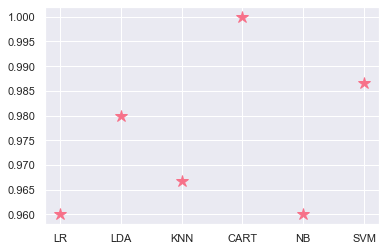

In [37]:
# compare algorithms
#fig = plt.figure()
#fig.suptitle('Algorithm Comparison')
#ax = fig.add_subplot(111)
plt.plot(names, results, '*', markersize=12)
#ax.set_xticklabels(names)
plt.show()

In [38]:
mx = max(results)
ix = results.index(max(results))
msg1 = "Best result for model with accuracy, %s: %f" % (names[ix], mx)
print(msg1)

Best result for model with accuracy, CART: 1.000000


# Train/test split Dataset

* Train/Test split

In [39]:
LR = LogisticRegression()
LR.fit(X_train, y_train)

LR.score(X_test, y_test)
#predictions = LR.predict(X_test)
#print("Accuracy:", accuracy_score(y_test, predictions))

#cross_val_score(LR, X_test, y_test, scoring = scoring).mean() # DON'T USE HERE

0.8

In [40]:
# Spot check algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model
results = []
names = []
for name, model in models:
    #kfold = model_selection.KFold(n_splits = 5, random_state = seed)
    fitting  = model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    cv_results = accuracy_score(y_test, predictions)
    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (name, cv_results)
    print(msg)

LR: 0.800000 
LDA: 0.966667 
KNN: 0.900000 
CART: 0.866667 
NB: 0.833333 
SVM: 0.933333 


In [41]:
results

[0.8,
 0.9666666666666667,
 0.9,
 0.8666666666666667,
 0.8333333333333334,
 0.9333333333333333]

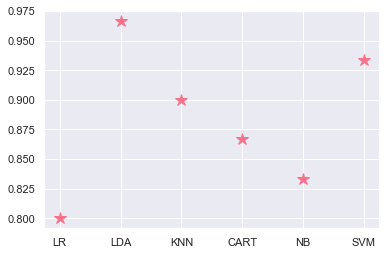

In [42]:
# compare algorithms
#fig = plt.figure()
#fig.suptitle('Algorithm Comparison')
#ax = fig.add_subplot(111)
plt.plot(names, results, '*', markersize=12)
#ax.set_xticklabels(names)
plt.show()

In [43]:
mx = max(results)
ix = results.index(max(results))
msg1 = "Best result for model with accuracy, %s: %f" % (names[ix], mx)
print(msg1)

Best result for model with accuracy, LDA: 0.966667


* K-fold Cross-validation

In [44]:
# Classification accuracy
LR = LogisticRegression()

#LR.score(X, y) # DON'T USE HERE

#predicted = cross_val_predict(LR, X, y, cv=5)
#accuracy_score(y, predicted)
cross_val_score(LR, X, y, cv=5, scoring='accuracy').mean()

0.9600000000000002

In [45]:
# Spot check algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model
results = []
names = []
results_mean = []
for name, model in models:
    kfold = model_selection.KFold(n_splits = 5, random_state = seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv = kfold, scoring = 'accuracy')  
    
    results.append(cv_results)
    names.append(name)
    results_mean.append(cv_results.mean())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.753333 (0.262128)
LDA: 0.960000 (0.048990)
KNN: 0.913333 (0.083267)
CART: 0.913333 (0.068638)
NB: 0.946667 (0.033993)
SVM: 0.933333 (0.069921)


In [46]:
results_mean

[0.7533333333333333,
 0.96,
 0.9133333333333333,
 0.9133333333333333,
 0.9466666666666667,
 0.9333333333333333]

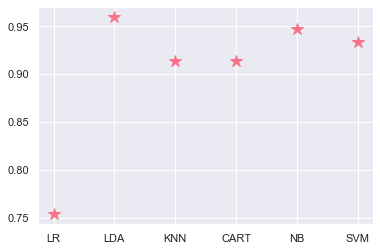

In [47]:
# compare algorithms
#fig = plt.figure()
#fig.suptitle('Algorithm Comparison')
#ax = fig.add_subplot(111)
plt.plot(names, results_mean, '*', markersize=12)
#ax.set_xticklabels(names)
plt.show()

In [48]:
mx = max(results_mean)
ix = results_mean.index(max(results_mean))
msg1 = "Best result for model with accuracy, %s: %f" % (names[ix], mx)
print(msg1)

Best result for model with accuracy, LDA: 0.960000


In [49]:
results

[array([1.        , 0.93333333, 0.43333333, 0.96666667, 0.43333333]),
 array([1. , 1. , 0.9, 1. , 0.9]),
 array([1.        , 1.        , 0.83333333, 0.93333333, 0.8       ]),
 array([1.        , 0.96666667, 0.83333333, 0.93333333, 0.83333333]),
 array([1.        , 0.96666667, 0.9       , 0.93333333, 0.93333333]),
 array([1.        , 1.        , 0.86666667, 0.96666667, 0.83333333])]

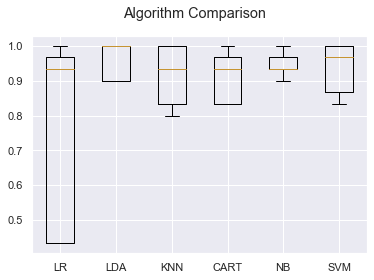

In [50]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

* Leave One Out (LOO) Cross-Validation

In [51]:
from sklearn.model_selection import LeaveOneOut

In [52]:
LR = LogisticRegression()
#num_folds = 10
loocv = model_selection.LeaveOneOut()
results = model_selection.cross_val_score(LR, X, y, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 95.333% (21.092%)


In [53]:
# Spot check algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model
results = []
names = []
results_mean = []
for name, model in models:
    seed = 7
    loocv = model_selection.LeaveOneOut()
    cv_results = model_selection.cross_val_score(model, X, y, cv = loocv, scoring = 'accuracy')  
    
    results.append(cv_results)
    names.append(name)
    results_mean.append(cv_results.mean())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.953333 (0.210924)
LDA: 0.980000 (0.140000)
KNN: 0.966667 (0.179505)
CART: 0.946667 (0.224697)
NB: 0.953333 (0.210924)
SVM: 0.973333 (0.161107)


In [54]:
results_mean

[0.9533333333333334,
 0.98,
 0.9666666666666667,
 0.9466666666666667,
 0.9533333333333334,
 0.9733333333333334]

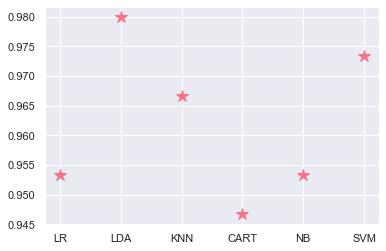

In [55]:
# compare algorithms
#fig = plt.figure()
#fig.suptitle('Algorithm Comparison')
#ax = fig.add_subplot(111)
plt.plot(names, results_mean, '*', markersize=12)
#ax.set_xticklabels(names)
plt.show()

In [56]:
mx = max(results_mean)
ix = results_mean.index(max(results_mean))
msg1 = "Best result for model with accuracy, %s: %f" % (names[ix], mx)
print(msg1)

Best result for model with accuracy, LDA: 0.980000


* Repeated Random Test-Train Splits

In [57]:
model = LogisticRegression()
#num_samples = 10
#num_instances = len(X)
test_size = 0.33
seed = 7
kfold = model_selection.ShuffleSplit(n_splits=10, test_size=test_size, random_state=seed)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 93.800% (3.027%)


In [58]:
# Spot check algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model
results = []
names = []
results_mean = []
for name, model in models:
    test_size = 0.33
    seed = 7
    kfold = model_selection.ShuffleSplit(n_splits=10, test_size=test_size, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, y, cv = kfold, scoring = 'accuracy')  
    
    results.append(cv_results)
    names.append(name)
    results_mean.append(cv_results.mean())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.938000 (0.030265)
LDA: 0.974000 (0.018000)
KNN: 0.960000 (0.021909)
CART: 0.942000 (0.026000)
NB: 0.948000 (0.036000)
SVM: 0.974000 (0.020100)


In [59]:
results_mean

[0.9380000000000001,
 0.974,
 0.96,
 0.9419999999999998,
 0.9480000000000001,
 0.974]

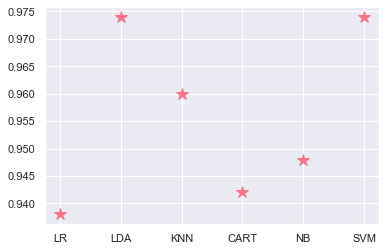

In [60]:
# compare algorithms
#fig = plt.figure()
#fig.suptitle('Algorithm Comparison')
#ax = fig.add_subplot(111)
plt.plot(names, results_mean, '*', markersize=12)
#ax.set_xticklabels(names)
plt.show()

In [61]:
mx = max(results_mean)
ix = results_mean.index(max(results_mean))
msg1 = "Best result for model with accuracy, %s: %f" % (names[ix], mx)
print(msg1)

Best result for model with accuracy, LDA: 0.974000


In [62]:
results

[array([0.9 , 0.96, 0.88, 0.94, 0.96, 0.98, 0.92, 0.96, 0.96, 0.92]),
 array([0.96, 0.96, 0.96, 0.94, 1.  , 1.  , 0.98, 0.98, 0.98, 0.98]),
 array([0.92, 0.94, 0.94, 0.96, 0.94, 0.98, 0.98, 0.98, 0.98, 0.98]),
 array([0.92, 0.92, 0.94, 0.92, 0.9 , 0.98, 0.96, 0.98, 0.94, 0.96]),
 array([0.9 , 0.92, 0.9 , 0.92, 0.94, 1.  , 0.98, 1.  , 0.96, 0.96]),
 array([0.96, 1.  , 0.94, 0.94, 0.98, 1.  , 0.98, 0.98, 0.98, 0.98])]

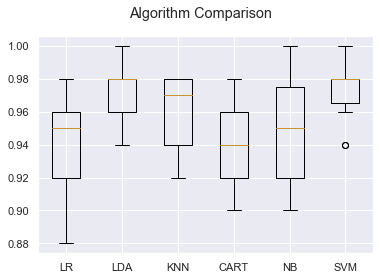

In [63]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# PCA

* PCA 1 - using accuracy_score

In [64]:
# make predictions
LR = LogisticRegression()
LR.fit(X_pca, y)

newdata_transformed = pca.transform(X)
predictions = LR.predict(newdata_transformed)
#predictions = LR.predict(pca.transform(X))

print("Accuracy:", accuracy_score(y, predictions))
#print(confusion_matrix(y, predictions))
#print(classification_report(y, predictions))

Accuracy: 0.9133333333333333


In [65]:
# Spot check algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

#pca = PCA(n_components=2)
#X_pca = pca.fit_transform(X)

# evaluate each model
results = []
names = []
for name, model in models:
    model.fit(X_pca, y)
    newdata_transformed = pca.transform(X)
    predictions = model.predict(newdata_transformed)
    cv_results = accuracy_score(y, predictions)
    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f " % (name, cv_results)
    print(msg)

LR: 0.913333 
LDA: 0.960000 
KNN: 0.980000 
CART: 1.000000 
NB: 0.900000 
SVM: 0.953333 


In [66]:
results

[0.9133333333333333, 0.96, 0.98, 1.0, 0.9, 0.9533333333333334]

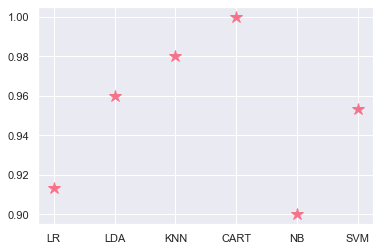

In [67]:
# compare algorithms
#fig = plt.figure()
#fig.suptitle('Algorithm Comparison')
#ax = fig.add_subplot(111)
plt.plot(names, results, '*', markersize=12)
#ax.set_xticklabels(names)
plt.show()

In [68]:
mx = max(results)
ix = results.index(max(results))
msg1 = "Best result for model with accuracy, %s: %f" % (names[ix], mx)
print(msg1)

Best result for model with accuracy, CART: 1.000000


* PCA 2 - Using cross_val_score

In [69]:
# make predictions
#LR = LogisticRegression()
#LR.fit(X_pca, y)

#newdata_transformed = pca.transform(X)
#predictions = LR.predict(newdata_transformed)
#predictions = LR.predict(pca.transform(X))

#model_selection.cross_val_score(LR, predictions, y, scoring = 'accuracy').mean()

# PCA Pipelining

In [70]:
from sklearn.pipeline import Pipeline

* Pipelining 1 - Using accuracy_score 

In [71]:
pipe = Pipeline( [ ('pca', PCA(n_components=2)), ('LR', LogisticRegression()) ] )
pipe.fit(X, y)
predictions = pipe.predict(X)
accuracy_score(y, predictions)
#cross_val_score(pipe, X, y).mean()

0.9133333333333333

In [72]:
# Spot check algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model
results = []
names = []
results_mean = []
for name, model in models:
    pipe = Pipeline( [ ('pca', PCA(n_components=2)), (name, model) ] )
    pipe.fit(X, y)
    predictions = pipe.predict(X)
    #cv_results = cross_val_score(pipe, X, y)
    cv_results = accuracy_score(y , predictions)
    
    results.append(cv_results)
    names.append(name)
    results_mean.append(cv_results.mean())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.913333 (0.000000)
LDA: 0.960000 (0.000000)
KNN: 0.980000 (0.000000)
CART: 1.000000 (0.000000)
NB: 0.900000 (0.000000)
SVM: 0.953333 (0.000000)


In [73]:
results_mean

[0.9133333333333333, 0.96, 0.98, 1.0, 0.9, 0.9533333333333334]

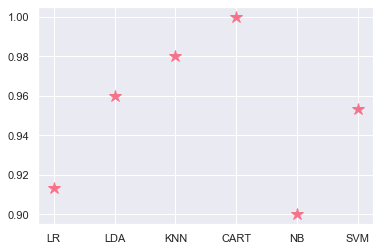

In [74]:
# compare algorithms
#fig = plt.figure()
#fig.suptitle('Algorithm Comparison')
#ax = fig.add_subplot(111)
plt.plot(names, results_mean, '*', markersize=12)
#ax.set_xticklabels(names)
plt.show()

In [75]:
mx = max(results_mean)
ix = results_mean.index(max(results_mean))
msg1 = "Best result for model with accuracy, %s: %f" % (names[ix], mx)
print(msg1)

Best result for model with accuracy, CART: 1.000000


* Pipelining 2 - Using cross_val_score

In [76]:
pipe = Pipeline( [ ('pca', PCA(n_components=2)), ('LR', LogisticRegression()) ] )
pipe.fit(X, y)

predictions = pipe.predict(X)

cross_val_score(pipe, X, y).mean()

0.8884803921568628

In [77]:
# Spot check algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model
results = []
names = []
results_mean = []
for name, model in models:
    pipe = Pipeline( [ ('pca', PCA(n_components=2)), (name, model) ] )
    pipe.fit(X, y)
    pipe.predict(X)
    cv_results = cross_val_score(pipe, X, y)
        
    results.append(cv_results)
    names.append(name)
    results_mean.append(cv_results.mean())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.888480 (0.071675)
LDA: 0.966912 (0.018204)
KNN: 0.960376 (0.015512)
CART: 0.914216 (0.039369)
NB: 0.887255 (0.022285)
SVM: 0.966912 (0.018204)


In [78]:
results_mean

[0.8884803921568628,
 0.9669117647058822,
 0.960375816993464,
 0.9142156862745098,
 0.8872549019607843,
 0.9669117647058822]

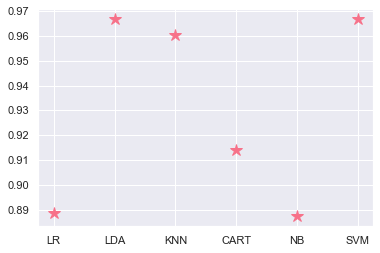

In [79]:
# compare algorithms
#fig = plt.figure()
#fig.suptitle('Algorithm Comparison')
#ax = fig.add_subplot(111)
plt.plot(names, results_mean, '*', markersize=12)
#ax.set_xticklabels(names)
plt.show()

In [80]:
mx = max(results_mean)
ix = results_mean.index(max(results_mean))
msg1 = "Best result for model with accuracy, %s: %f" % (names[ix], mx)
print(msg1)

Best result for model with accuracy, LDA: 0.966912


In [81]:
results

[array([0.80392157, 0.88235294, 0.97916667]),
 array([0.98039216, 0.94117647, 0.97916667]),
 array([0.96078431, 0.94117647, 0.97916667]),
 array([0.92156863, 0.8627451 , 0.95833333]),
 array([0.8627451 , 0.88235294, 0.91666667]),
 array([0.98039216, 0.94117647, 0.97916667])]

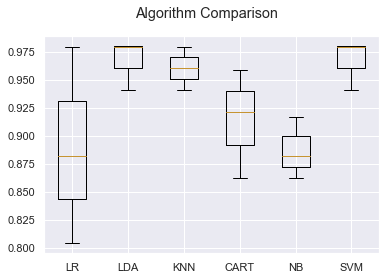

In [82]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()